## Image classification with neural networks

#### By: Haden Loveridge, Alex Parson, Biagio Alessandrello


#### Importing Packages

In [34]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np

#### Loading in the data and creating the 80/20 testing splits

In [35]:
# Loading Data

data_dir = '/Users/biagio/Desktop/STAS380/Part_2/STA380-master/data/EuroSAT_RGB'

# Define transformations for the training and validation datasets
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the full dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Load the datasets
train_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [54]:
# Neural Network Model

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
num_classes = len(train_dataset.dataset.classes)
model = SimpleCNN(num_classes=num_classes)

# Print the model architecture
print(model)

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8192, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


In [55]:
# Loss Function and Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [56]:
# Training

num_epochs = 10


In [40]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_train_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print statistics for each epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')
    print('-' * 50)

Epoch [1/10]
Train Loss: 0.3294, Train Accuracy: 88.53%
Validation Loss: 0.3738, Validation Accuracy: 87.15%
--------------------------------------------------
Epoch [2/10]
Train Loss: 0.2646, Train Accuracy: 90.77%
Validation Loss: 0.3963, Validation Accuracy: 87.02%
--------------------------------------------------
Epoch [3/10]
Train Loss: 0.2003, Train Accuracy: 92.92%
Validation Loss: 0.3624, Validation Accuracy: 88.07%
--------------------------------------------------
Epoch [4/10]
Train Loss: 0.1628, Train Accuracy: 94.36%
Validation Loss: 0.3936, Validation Accuracy: 88.17%
--------------------------------------------------
Epoch [5/10]
Train Loss: 0.1377, Train Accuracy: 95.24%
Validation Loss: 0.4597, Validation Accuracy: 87.70%
--------------------------------------------------
Epoch [6/10]
Train Loss: 0.1022, Train Accuracy: 96.49%
Validation Loss: 0.3848, Validation Accuracy: 89.87%
--------------------------------------------------
Epoch [7/10]
Train Loss: 0.1033, Train A

Using PyTorch to clasify the pictures in EuroSAT_RBG pictures into a 80/20 split. After running the model with epoch of 10, it ended up giving the following results on the final Epoch of Train Loss: 0.0695, Train Accuracy: 97.64%, Validation Loss: 0.4673, Validation Accuracy: 90.20%. 

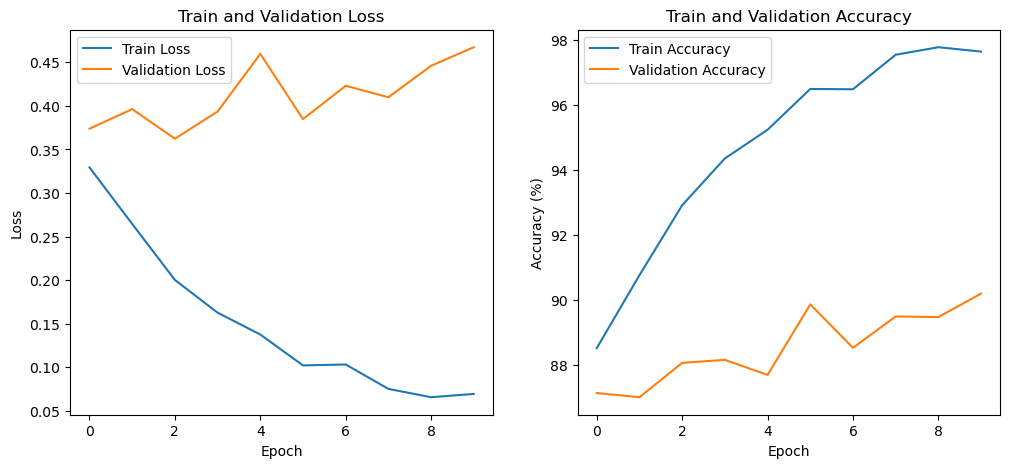

In [41]:
# Plot the training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

As you can see above on the Train Loss and Accuracy charts, the two are slowly diverging. As the model trains more and more on the training data due to overfitting, the loss increases. 

In [43]:
# Save the model

torch.save(model.state_dict(), 'euroSAT_model.pth')

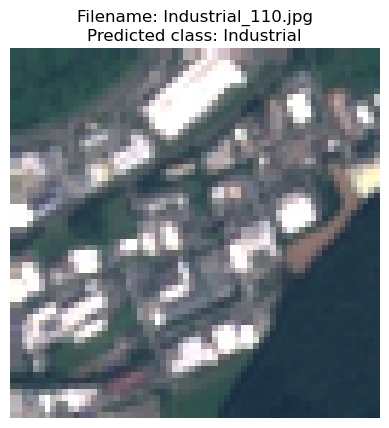

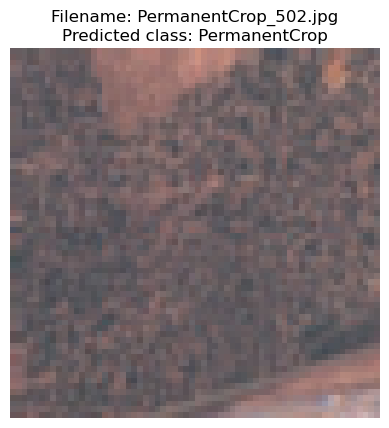

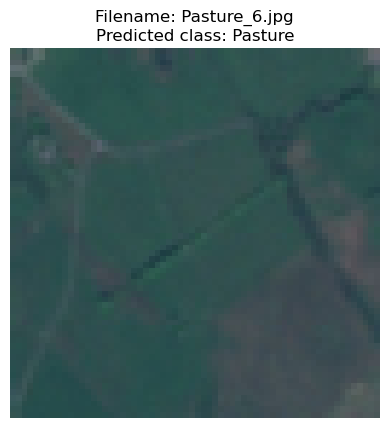

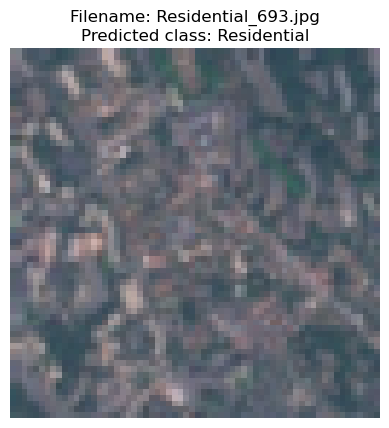

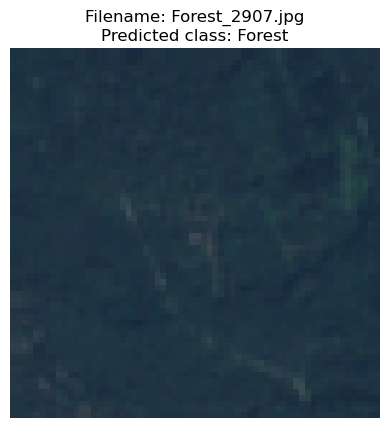

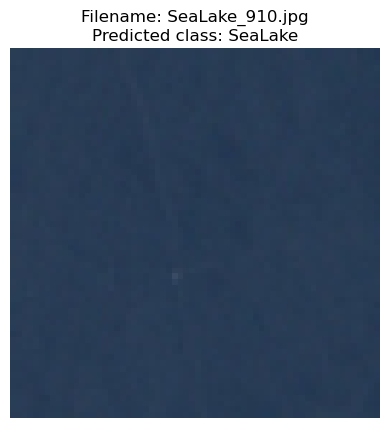

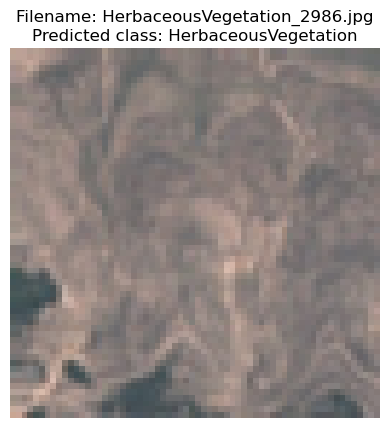

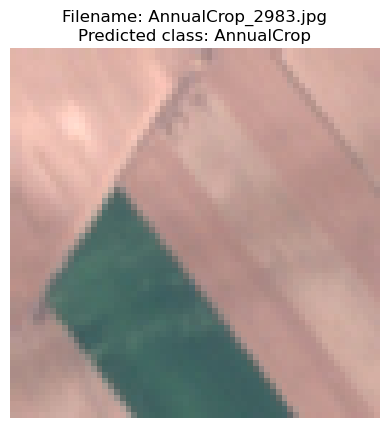

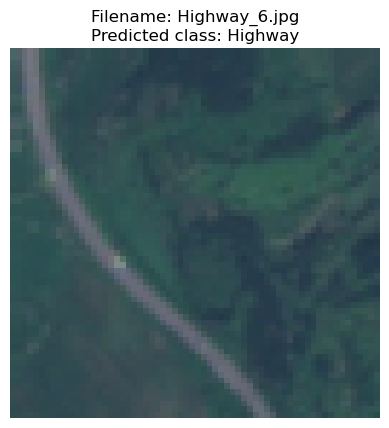

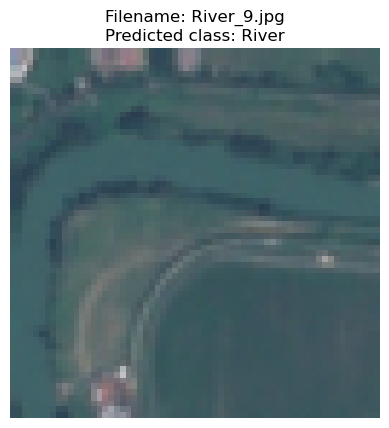

In [44]:
# Make Predictions

from PIL import Image

def load_and_prep_image(filepath, transform):
    img = Image.open(filepath)
    img = transform(img).unsqueeze(0)  # Add batch dimension
    return img

# Path to the folder containing the images
image_folder_path = '/Users/biagio/Desktop/STAS380/Part_2/STA380-master/data/Predicted'

# Load the model (make sure it's in evaluation mode)
model.eval()

# Loop through each image in the folder
for image_name in os.listdir(image_folder_path):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
        image_path = os.path.join(image_folder_path, image_name)
        img_tensor = load_and_prep_image(image_path, transform)
        
        # Make prediction
        with torch.no_grad():
            prediction = model(img_tensor)
            predicted_class = torch.argmax(prediction, dim=1)
            predicted_label = full_dataset.classes[predicted_class.item()]

        # Load the image for display
        img = Image.open(image_path)

        # Display the image, filename, and its predicted class
        plt.figure()
        plt.imshow(img)
        plt.title(f"Filename: {image_name}\nPredicted class: {predicted_label}")
        plt.axis('off')  # Hide axes
        plt.show()

As shown in the pictures above, This instance of the model got all of the selected pictures correct.

In [57]:
# Data Augmentation

from torchvision import transforms

# Define transformations with data augmentation for training and without for validation
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(10),      # Randomly rotate the image by up to 10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Randomly change brightness, contrast, etc.
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the datasets with the new transformations
train_dataset = datasets.ImageFolder(root=data_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(root=data_dir, transform=val_transform)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [58]:
# add a learning rate schedule

from torch.optim import lr_scheduler

# Add a learning rate scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)  # Decay LR by a factor of 0.1 every 7 epochs

In [59]:
num_classes = len(full_dataset.classes)
print(f"Number of classes: {num_classes}")

Number of classes: 10


In [60]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_train_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print statistics for each epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')
    print('-' * 50)

Epoch [1/10]
Train Loss: 1.2219, Train Accuracy: 53.90%
Validation Loss: 0.9348, Validation Accuracy: 64.11%
--------------------------------------------------
Epoch [2/10]
Train Loss: 0.8200, Train Accuracy: 70.19%
Validation Loss: 0.7633, Validation Accuracy: 72.11%
--------------------------------------------------
Epoch [3/10]
Train Loss: 0.6822, Train Accuracy: 75.12%
Validation Loss: 0.6224, Validation Accuracy: 77.87%
--------------------------------------------------
Epoch [4/10]
Train Loss: 0.6035, Train Accuracy: 78.39%
Validation Loss: 0.6098, Validation Accuracy: 79.06%
--------------------------------------------------
Epoch [5/10]
Train Loss: 0.5250, Train Accuracy: 81.41%
Validation Loss: 0.5899, Validation Accuracy: 79.50%
--------------------------------------------------
Epoch [6/10]
Train Loss: 0.4886, Train Accuracy: 82.53%
Validation Loss: 0.4931, Validation Accuracy: 82.69%
--------------------------------------------------
Epoch [7/10]
Train Loss: 0.4383, Train A

I decided to try to improve the model past the 90.20% with Data Augmentation and Learning Rate Schedule, the results did not come up to the inital run but it did lead to some good metrics.

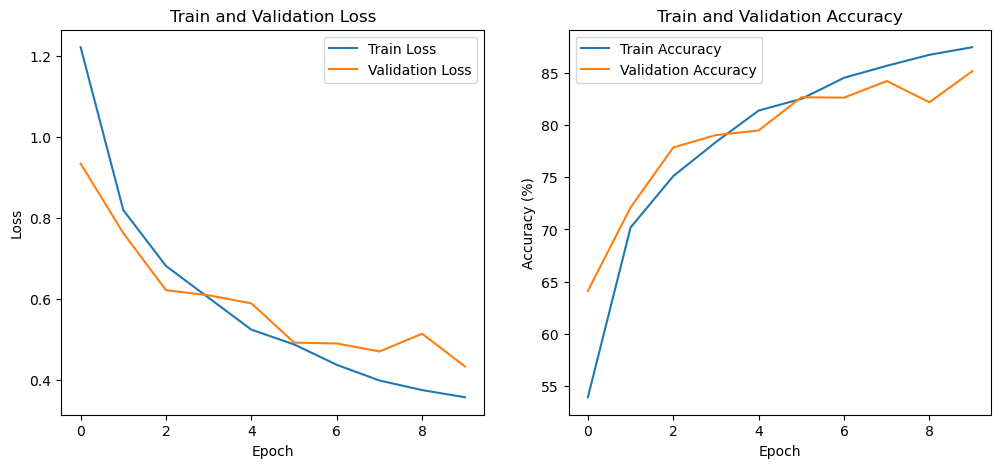

In [62]:
# Plot the training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

As shown on the graph, the testing accuracy is following closely to the training accuracy which was not the case in the original attempt. If we increased the Epoch to more than 10 it will improve the predictability of the model substantially.

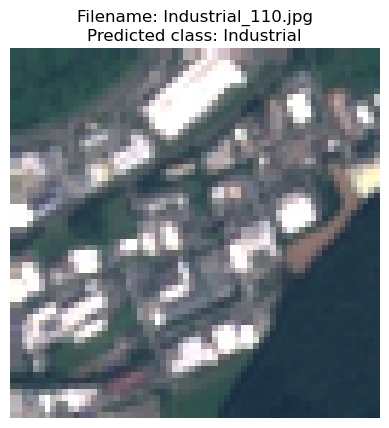

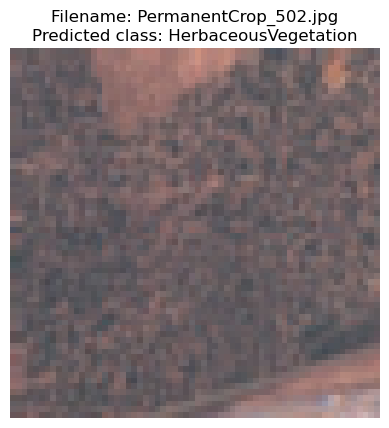

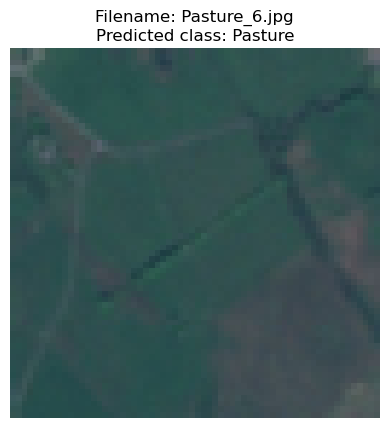

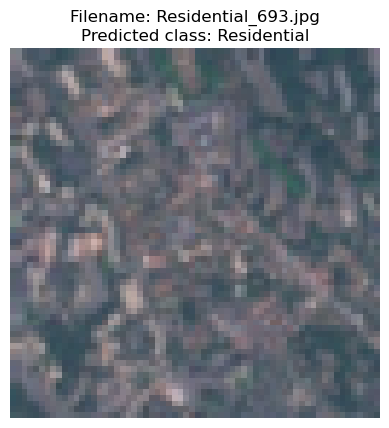

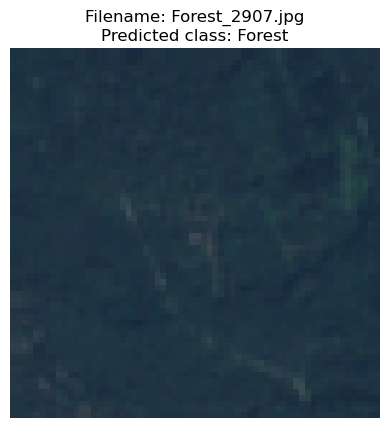

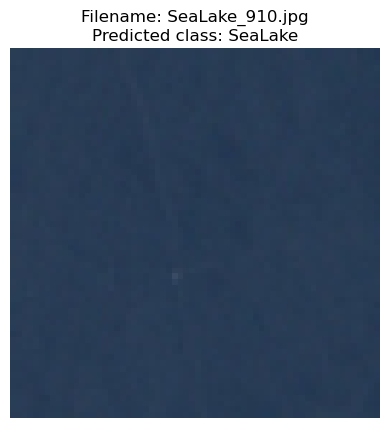

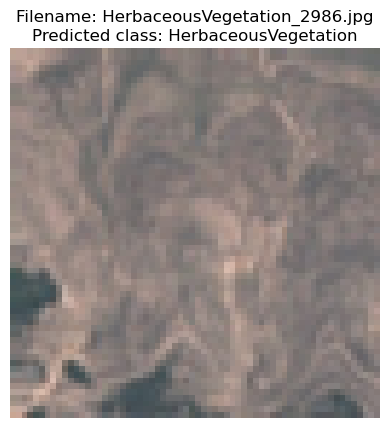

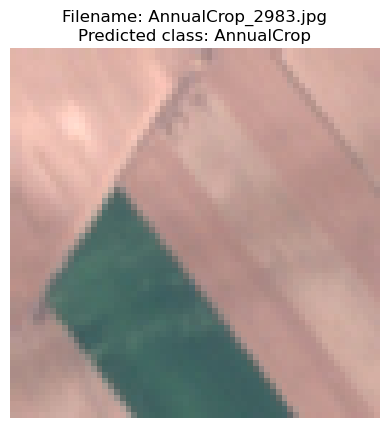

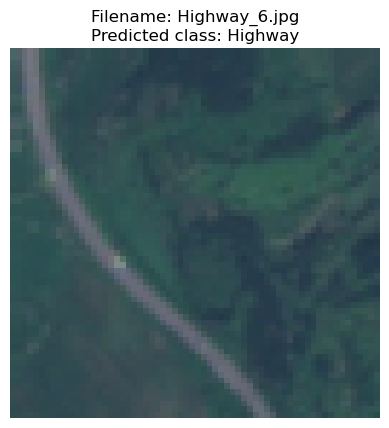

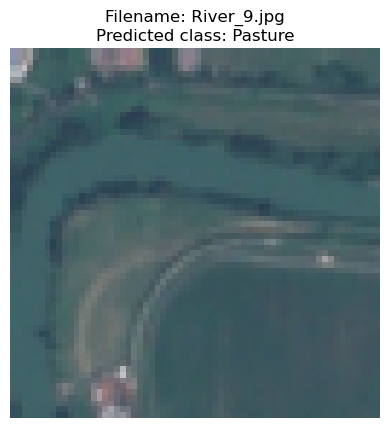

In [64]:
# Make Predictions

from PIL import Image

def load_and_prep_image(filepath, transform):
    img = Image.open(filepath)
    img = transform(img).unsqueeze(0)  # Add batch dimension
    return img

# Path to the folder containing the images
image_folder_path = '/Users/biagio/Desktop/STAS380/Part_2/STA380-master/data/Predicted'

# Load the model (make sure it's in evaluation mode)
model.eval()

# Loop through each image in the folder
for image_name in os.listdir(image_folder_path):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
        image_path = os.path.join(image_folder_path, image_name)
        img_tensor = load_and_prep_image(image_path, transform)
        
        # Make prediction
        with torch.no_grad():
            prediction = model(img_tensor)
            predicted_class = torch.argmax(prediction, dim=1)
            predicted_label = full_dataset.classes[predicted_class.item()]

        # Load the image for display
        img = Image.open(image_path)

        # Display the image, filename, and its predicted class
        plt.figure()
        plt.imshow(img)
        plt.title(f"Filename: {image_name}\nPredicted class: {predicted_label}")
        plt.axis('off')  # Hide axes
        plt.show()

Above are the pictures predicted. The model did get some wrong in this instance due to the lower performance of the training.

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure the model is in evaluation mode
model.eval()

# Initialize lists to store true labels and predictions
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

In [66]:
# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Optionally, you can normalize the confusion matrix
cm_normalized = confusion_matrix(all_labels, all_predictions, normalize='true')

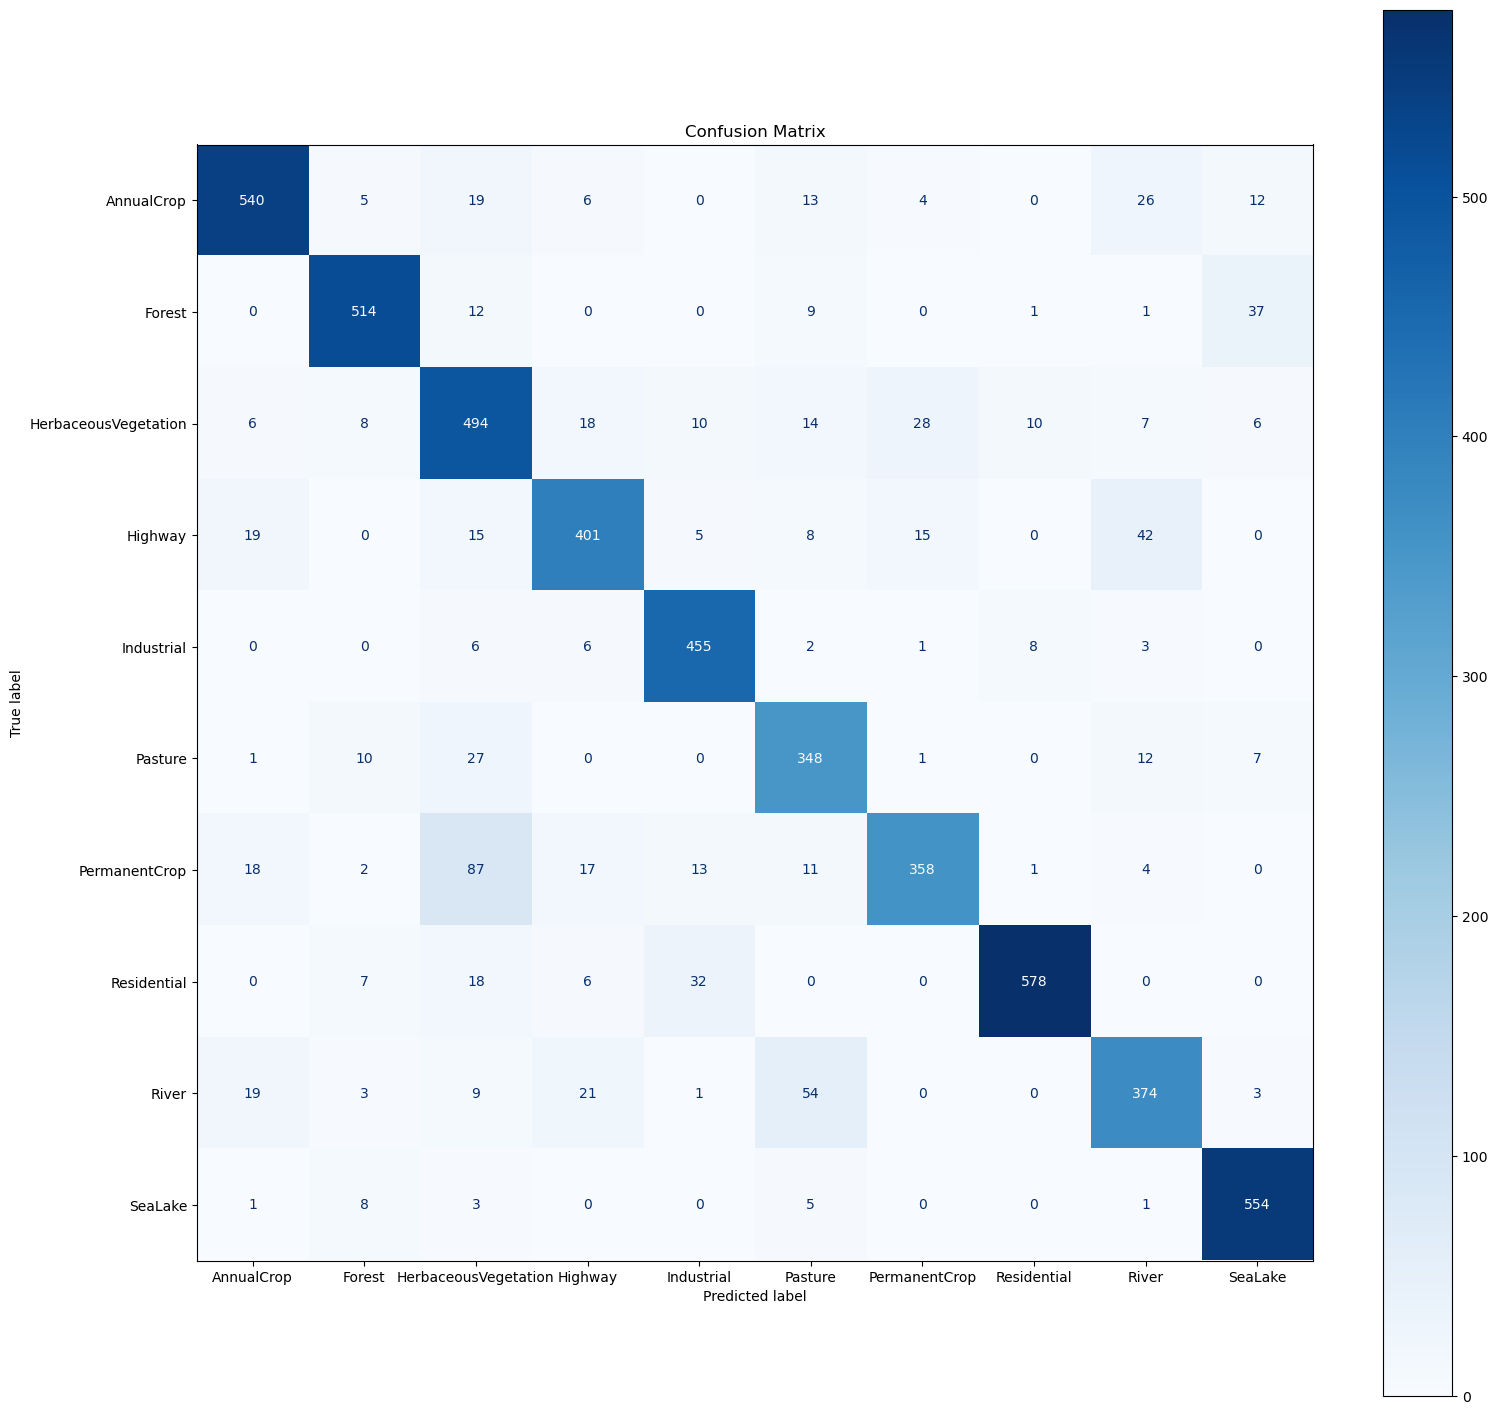

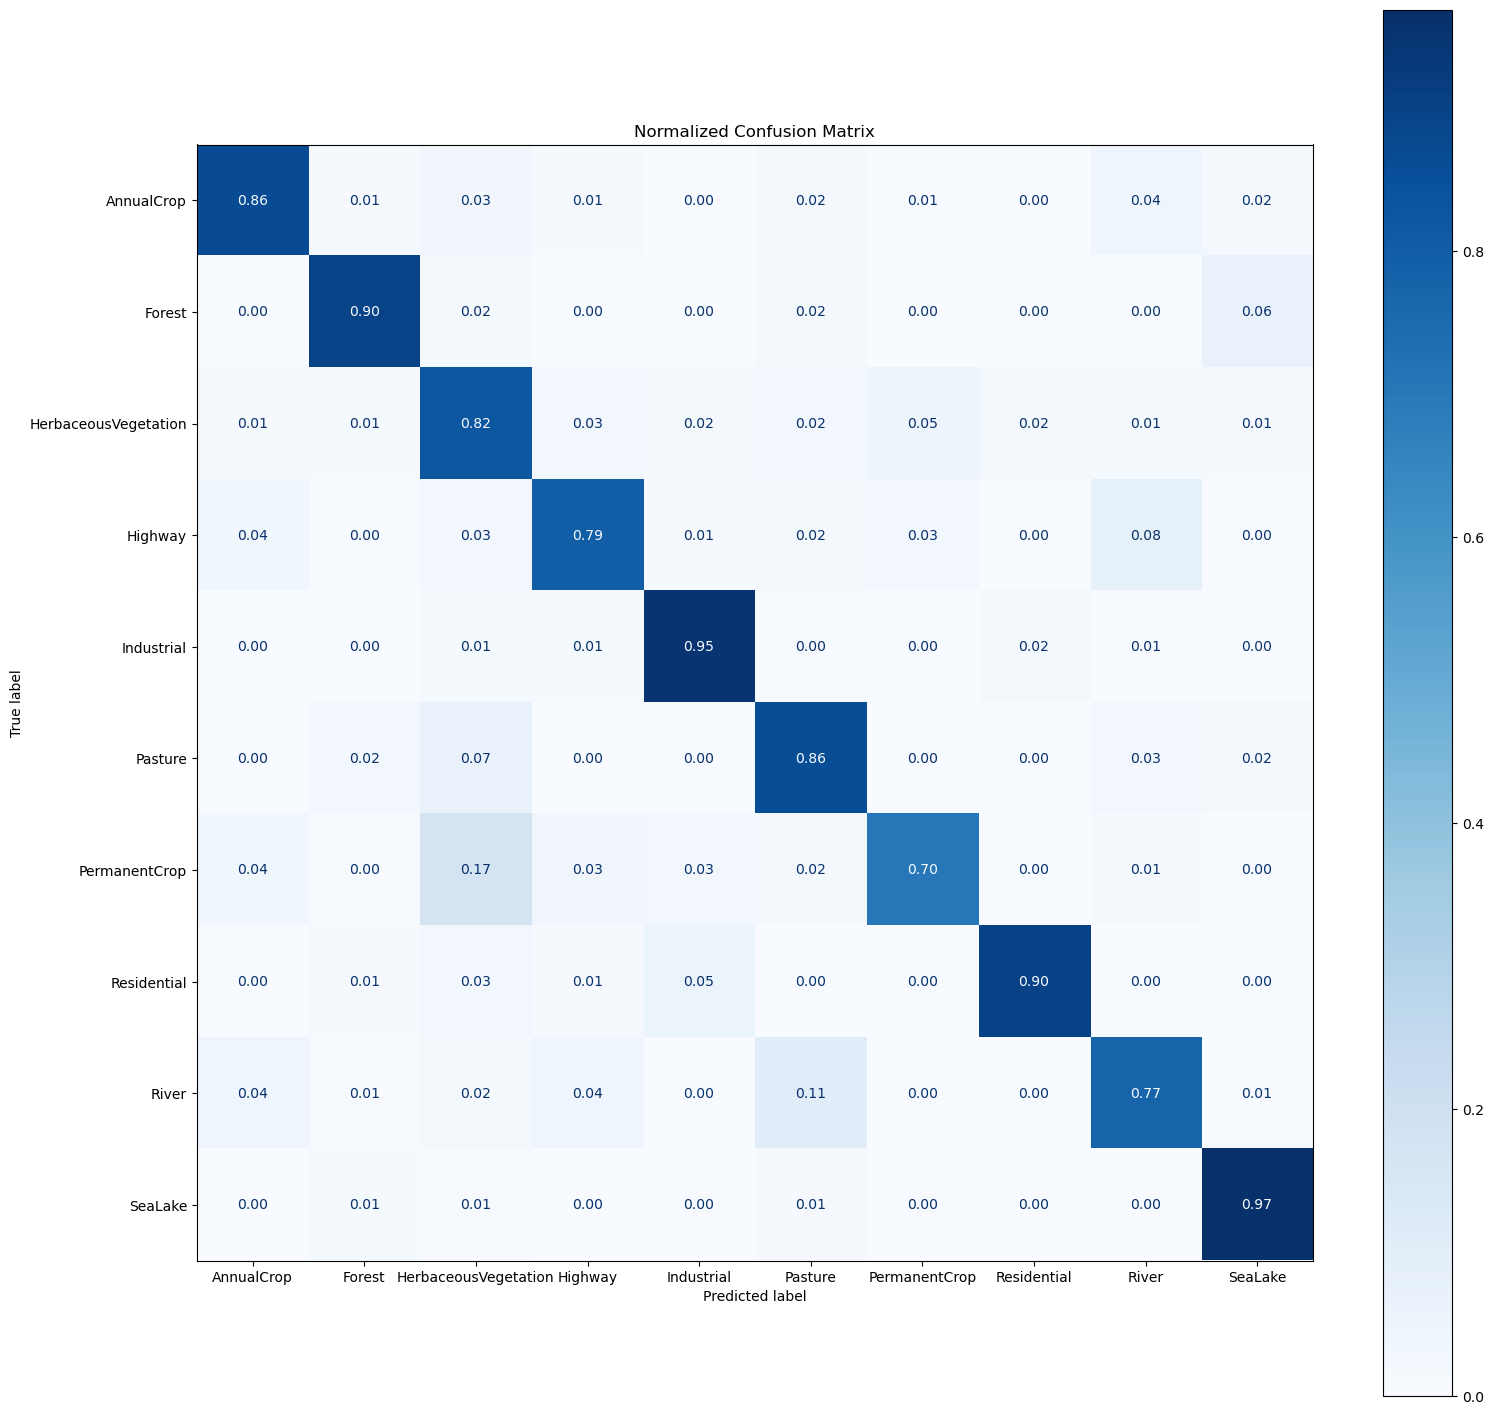

In [69]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(18, 18))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=full_dataset.classes)
cmd.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Plot the normalized confusion matrix
fig, ax = plt.subplots(figsize=(18, 18))
cmd_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=full_dataset.classes)
cmd_normalized.plot(ax=ax, cmap='Blues', values_format='.2f')
plt.title('Normalized Confusion Matrix')
plt.show()

Above you can see the confusion metrix from the analysis.